# Chapter 11-1. RNN basics

- RNN
- Usage of RNN

---

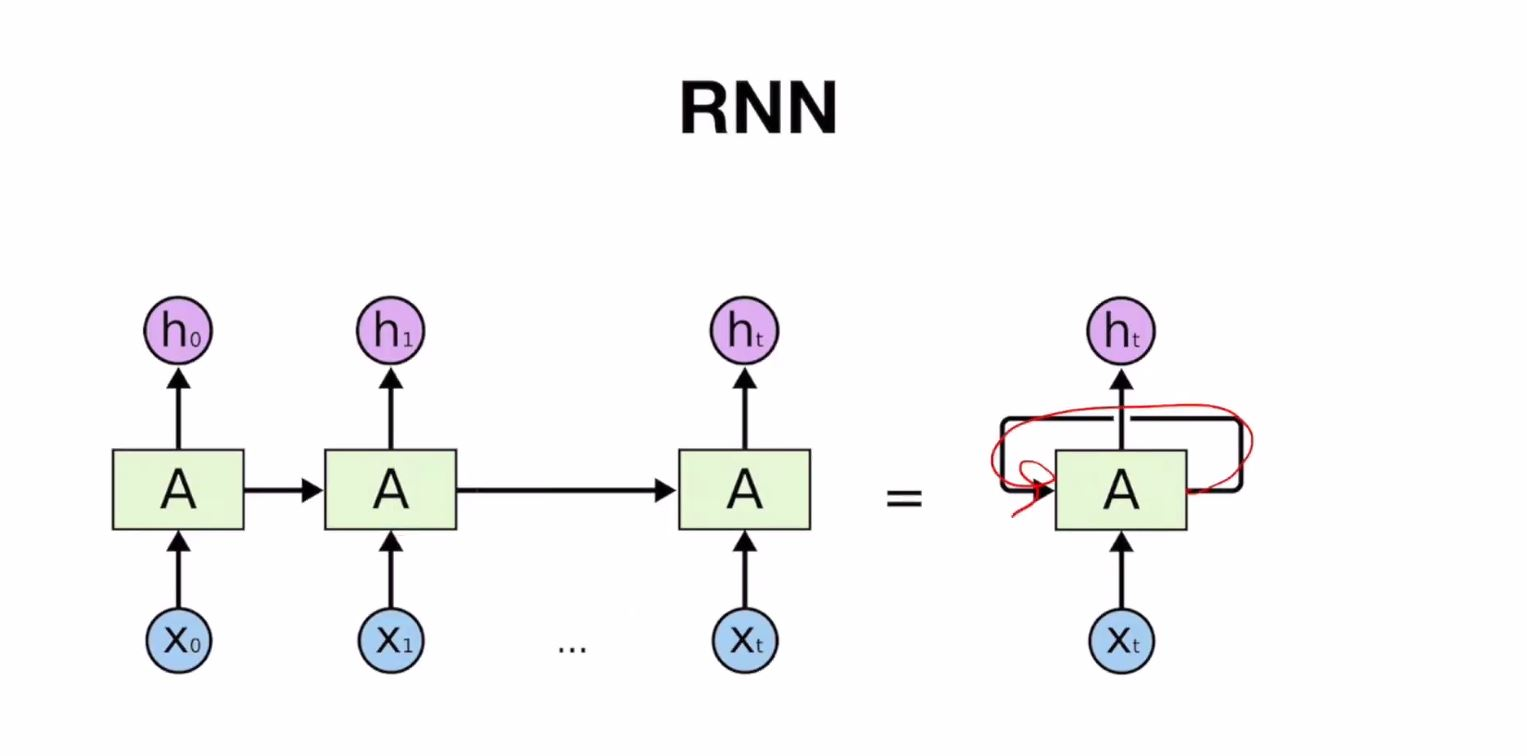

http://colah.github.io/posts/2015-08-Understanding-LSTMs/

## For Sequential Data
Such as word, sentence, time series, ..
- 데이터의 값뿐만 아니라 데이터의 **순서**도 중요한 의미를 가짐
- 어떤 데이터가 먼저 학습되냐에 따라 예측 성능이 달라진다면? 
- Word: "Hello" (h → e → l → l → o)


- RNN 아닌 NN에서도 sequential data 다룰 수 있음.
    - 벡터 앞에 *position index* 추가해 줌.
    - w 앞에도 position index 추가
    - position index 차원으로 입력되는 위치 정보/순서 정보 받아서 학습
    - 이런 연산만으로는 사람의 언어와 같이 순서가 중요하지만, 순서에 얽혀 있는 복잡한 구조를 모델이 파악하는 것 쉽지 않음
- RNN에서는 position index 대신, 순서 이해에 대한 설계 중심으로 나타나 있음

Hidden State: 출력되지 않고 다음 값으로 전달되는 값
- 이런 구조에서는 두 번째, 세 번째 출력값들은 앞 학습값을 반영
    - 모델이 순서 이해 가능
- 같은 l에 대해서 어떨 때는 l을 출력하고 어떨 때는 o을 출력
- RNN은 이전에 어떤 
    - 모델이 순서를 이해하는 것처럼 정확히 출력
- 모든 cell이 전부 파라미터를 공유 -> A가 하나
- 입력이 무엇이 되든(얼마나 길든), 우리는 A에 들어가는 parameter만 알고 있으면, 정상적으로 작동하는 모델 제작 가능함

- 기본적으로는 함수 연산 $ h_t = f(h_(t-1), x_t) $

    - for example, $h_t = tanh(W_h h_(t-1) + W_xx_t$ 

- LSTM, GRU - 유명한 설계들 중에 하나

- 복잡한 cell을 쓰면 같은 학습 수준에는 도달할 수 있지만, 그 수준에 도달할 수 있을 때까지 굉장히 많은 자원이 필요함.

---

## Usage of RNN

하나의 입력에 대해 여러 출력이 나옴.

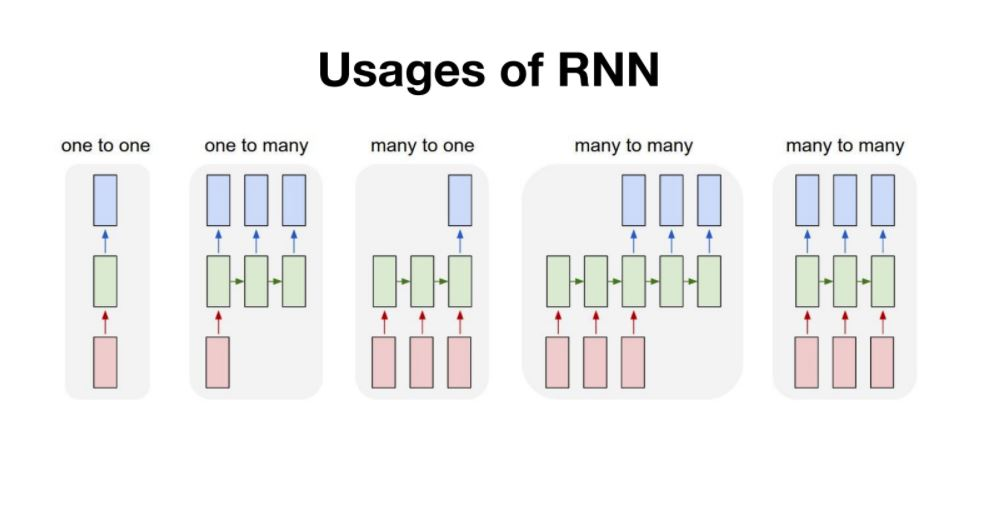

cs231n 2018 lecture 10

- ex) Many To One input-문장, output-감정

- ex) Many To Many input-문장, input-문장
    - 출력 지점이 다름: 문장을 끝까지 보기 위해 구조 설계가 되어 있는 RNN도 있음
    
  
- ex) 여러 개의 input이 있고 들어갈 때마다 output이 나오는 many to many 존재
    - video
    - 이미지가 들어가면 들어갈 때마다 출력값들 나옴
    - 이전 이미지에는 없었던 일들이 뒤에서 발생했다, 그러면 출력되는 값에서 어떤 변화가 있었다 이런 것들을 인식하고, 분석 결과를 내놓을 수 있다.

### RNN in Pytorch

- 데이터를 tensor로 바꾸는 과정

- RNN 선언 과정

```python rnn = torch.nn.RNN(input_size, hidden_size)```

- ht 집어넣고, 결과물로 반환하는 과정

```python outputs, _status - rnn(input_data)```

### params

*단어 → 벡터로 → RNN model 사용*

- ex) hello → 1-hot encoding & input_size = 4 → RNN

- ex) desirable output size → hidden_size = 2 → input_data shape = (-, -, 4) / outputs shape=(-, -, 2)

- **Hidden State** 어떻게 output 형태와 같이 가는가?
- **Sequence Length** unfold
    - x0~xt까지 넣음: t+1개의 길이를 가지는 sequence 생김
    - 이것이 바로 sequence length(여기서는 t+1)
    - 사용자가 알려 주지 않아도 파이토치가 자동적으로 파악

- h, e, l, l, o -> sequence length == 5
- 5개의 문자 입력됨: input_data shape = (-, *5*, 4) / outputs shape=(-, *5*, 2)

- **Batch Size**
 - 여러 개의 데이터를 하나의 Batch로 묶어서 모델 학습시킴
 - [h, e, l, l, o] [e, o, l, l, l], [l, l, e, e, l] → Set Batch Input → (Automatically Calculated) → input_data shape=(3, 5, 4) outputs shape = (3, 5, 4)

### Code Run

In [1]:
import torch
import numpy as np

In [3]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [4]:
# declare dimension
input_size = 4
hidden_size = 2

DATA 정제:

In [5]:
# singleton example
# shape : (1, 1, 4)
# input_data_np = np.array([[[1, 0, 0, 0]]])

# sequential example
# shape : (3, 5, 4)
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]
input_data_np = np.array([[h, e, l, l, o], [e, o, l, l, l], [l, l, e, e, l]], dtype=np.float32)

torch.Tensor로 transform

In [6]:
# transform as torch tensor
input_data = torch.Tensor(input_data_np)

RNN 구동:

In [7]:
# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size)

In [8]:
# check output
outputs, _status = rnn(input_data)
print(outputs)
print(outputs.size())

tensor([[[-0.7497, -0.6135],
         [-0.5282, -0.2473],
         [-0.9136, -0.4269],
         [-0.9136, -0.4269],
         [-0.9028,  0.1180]],

        [[-0.5753, -0.0070],
         [-0.9052,  0.2597],
         [-0.9173, -0.1989],
         [-0.9173, -0.1989],
         [-0.8996, -0.2725]],

        [[-0.9077, -0.3205],
         [-0.8944, -0.2902],
         [-0.5134, -0.0288],
         [-0.5134, -0.0288],
         [-0.9127, -0.2222]]], grad_fn=<StackBackward>)
torch.Size([3, 5, 2])
